# Model Performance

In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
class ModelPerformanceData:
    def __init__(self):
        self.epoch = []
        self.acc = []
        self.loss =[]
        self.val_acc = []
        self.val_loss = []

    def append(self, epoch, acc, loss, val_acc, val_loss):
        self.epoch.append(epoch)
        self.acc.append(acc)
        self.loss.append(loss)
        self.val_acc.append(val_acc)
        self.val_loss.append(val_loss)

    @staticmethod
    def from_ls_output(bash_output):
        data = ModelPerformanceData()

        # Extract values from text file.
        with open(bash_output) as f:
            lines = f.readlines()
        for line in lines:
            matches = re.findall(r'epoch(\d+)[^\d]+(\d+\.\d+)[^\d]+(\d+\.\d+)[^\d]+(\d+\.\d+)[^\d]+(\d+\.\d+)', line)
            if len(matches) > 0:
                values = tuple(map(lambda v: float(v), matches[0]))
                data.append(*values)
        return data

In [3]:
def plot_model_perf(plot_data, title='Model performance'):
    # Plot values
    f, axarr = plt.subplots(2, figsize=(15, 12), sharex=True)
    f.suptitle(title, fontsize=20)
    axarr[0].plot(plot_data.epoch, plot_data.acc, label='Training set', color='r')
    axarr[0].plot(plot_data.epoch, plot_data.val_acc, label='Validation set', color='g')
    axarr[0].set_ylim(0, 1)
    axarr[0].set_yticks(np.arange(0, 1, 0.1))
    axarr[0].set_ylabel('Accuracy')
    #axarr[0].set_xlabel('Epoch')
    
    # Plot loss curves
    axarr[1].plot(plot_data.epoch, plot_data.loss, label='Training set', color='r')
    axarr[1].plot(plot_data.epoch, plot_data.val_loss, label='Validation set', color='g')
    axarr[1].set_ylabel('Loss')
    axarr[1].set_xlabel('Epoch')
    
    for i in range(2):
        axarr[i].legend()
        axarr[i].grid(color='#eeeeee', linestyle='-', linewidth=2)
        axarr[i].set_xticks(np.arange(0, 100, 5))
        axarr[i].set_xlim(0, 100)

## VGG16

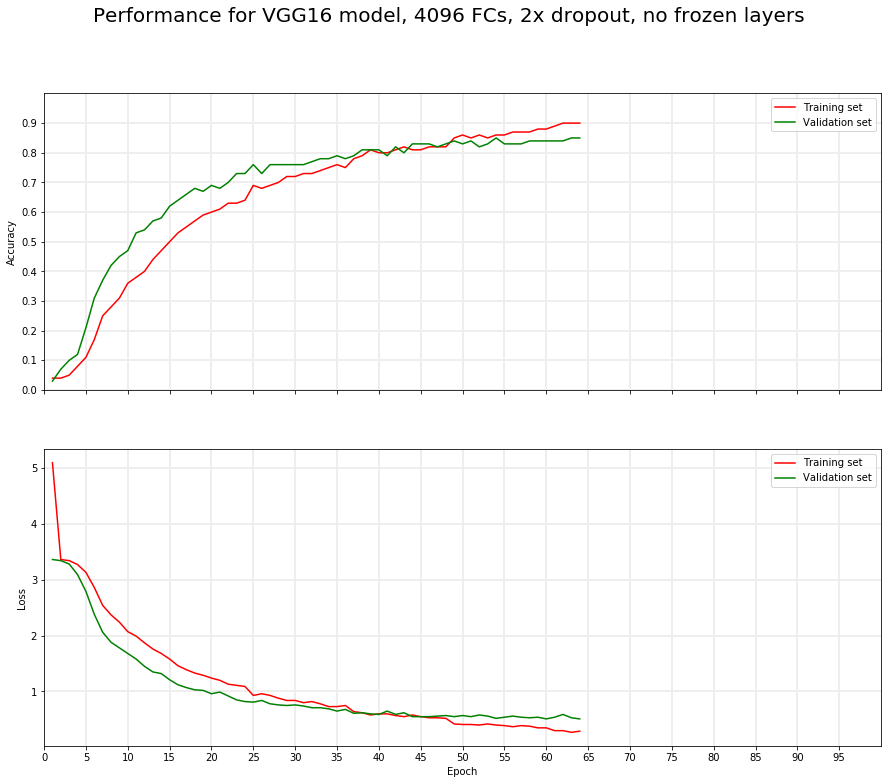

In [4]:
data = ModelPerformanceData.from_ls_output('model-02-vgg16-part-01-train-history.txt')
plot_model_perf(data, 'Performance for VGG16 model, 4096 FCs, 2x dropout, no frozen layers')

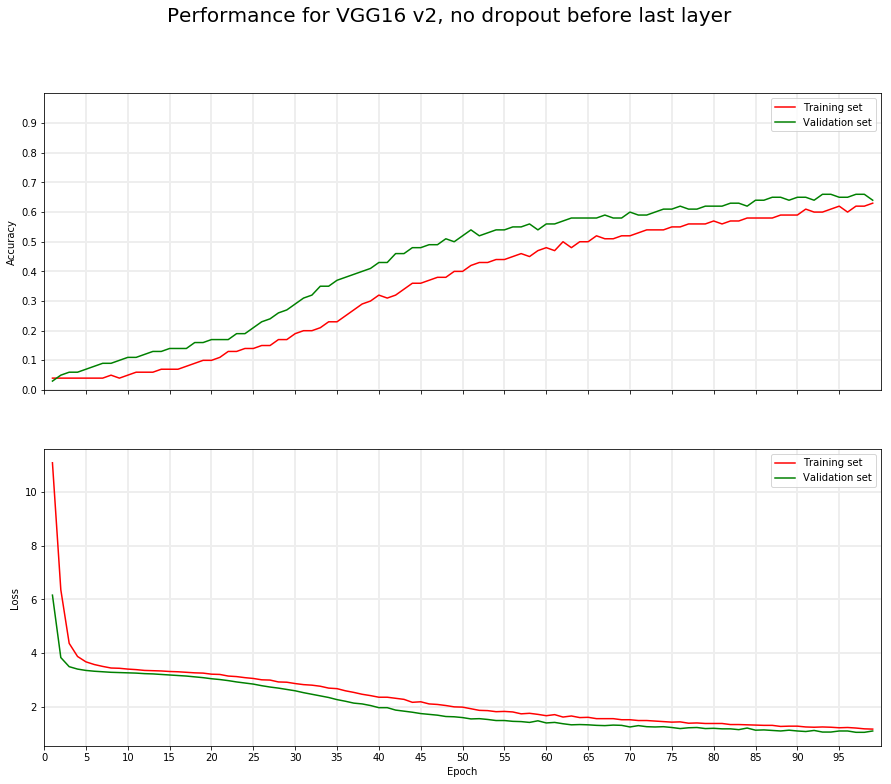

In [5]:
data = ModelPerformanceData.from_ls_output('model-02-vgg16v2-part-01-train-history.txt')
plot_model_perf(data, 'Performance for VGG16 v2, no dropout before last layer')

## VGG19

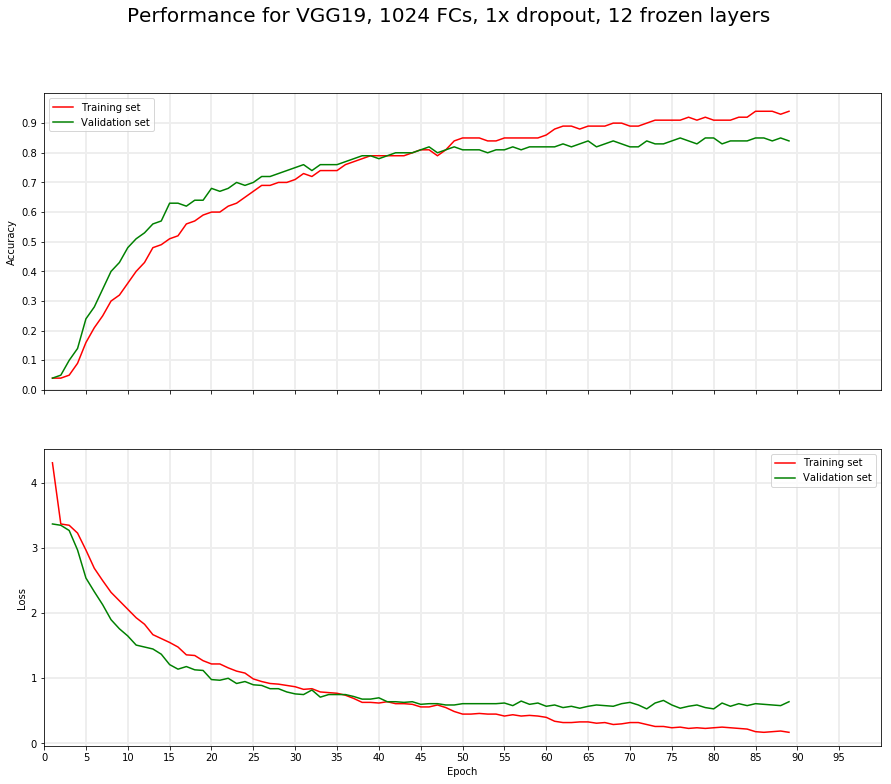

In [6]:
data = ModelPerformanceData.from_ls_output('model-04-vgg19-type-4-train-history.txt')
plot_model_perf(data, 'Performance for VGG19, 1024 FCs, 1x dropout, 12 frozen layers')

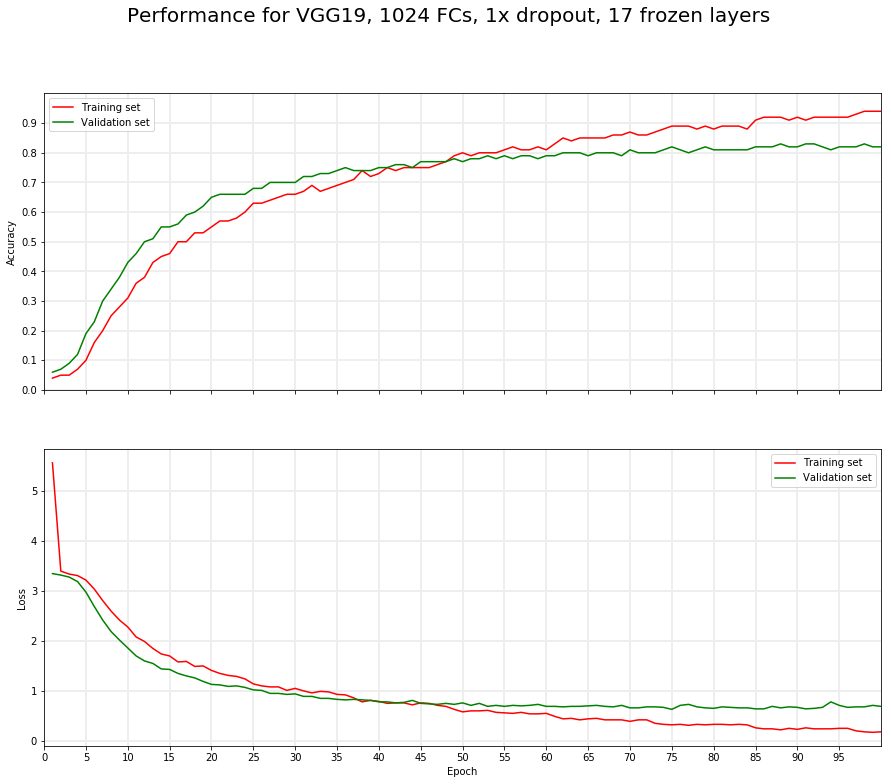

In [7]:
data = ModelPerformanceData.from_ls_output('model-04-vgg19-type-5-train-history.txt')
plot_model_perf(data, 'Performance for VGG19, 1024 FCs, 1x dropout, 17 frozen layers')

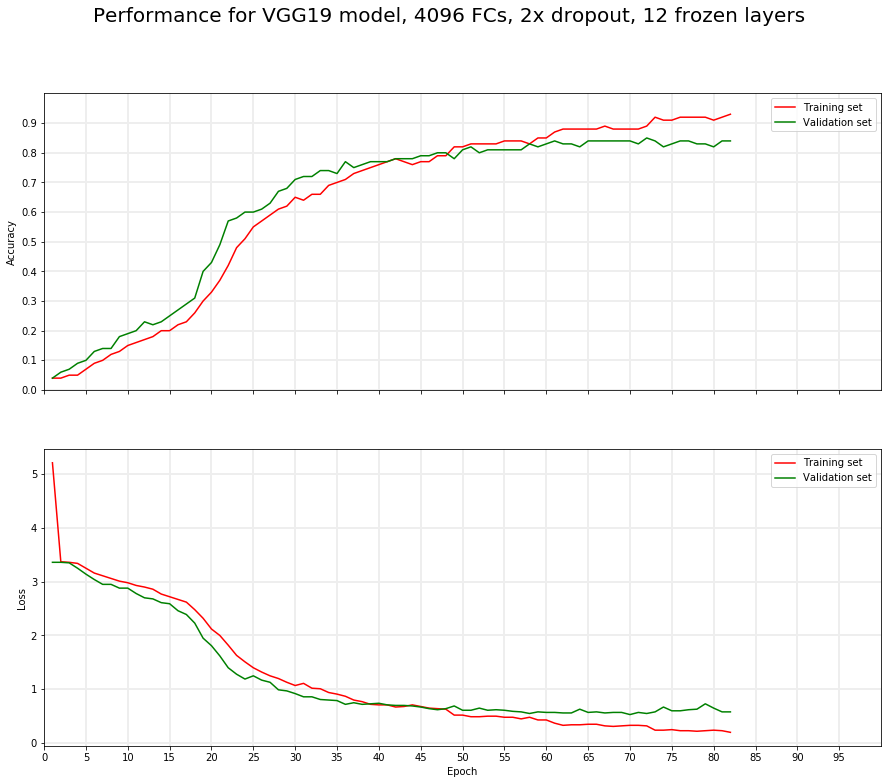

In [8]:
data = ModelPerformanceData.from_ls_output('model-06-vgg19v2-type-1-train-history.txt')
plot_model_perf(data, 'Performance for VGG19 model, 4096 FCs, 2x dropout, 12 frozen layers')

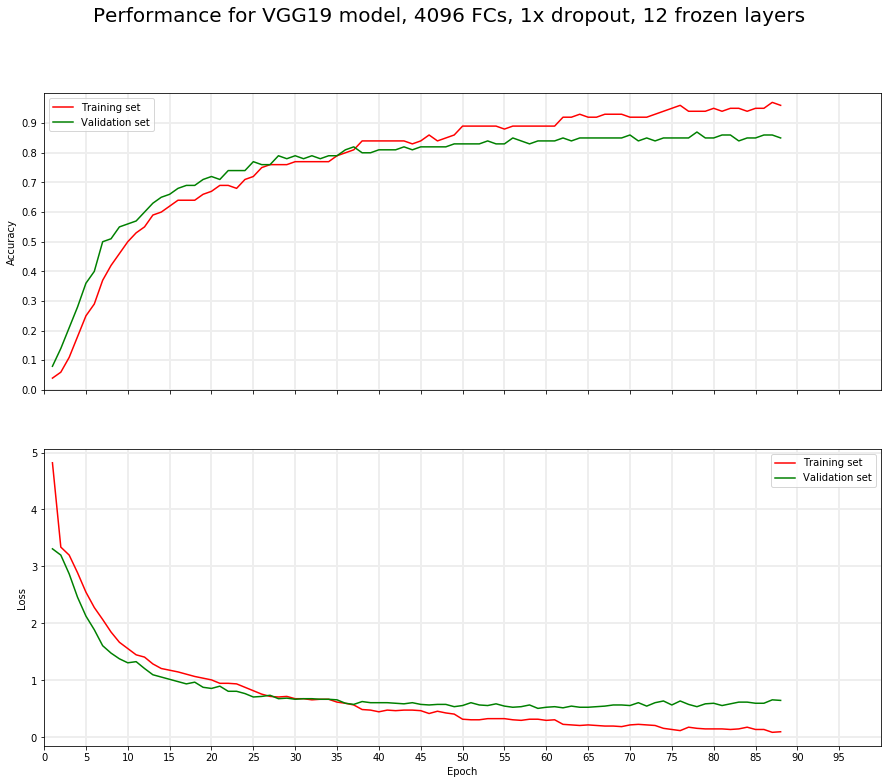

In [9]:
data = ModelPerformanceData.from_ls_output('model-08-vgg19v3-type-1-train-history.txt')
plot_model_perf(data, 'Performance for VGG19 model, 4096 FCs, 1x dropout, 12 frozen layers')

## Inception v3

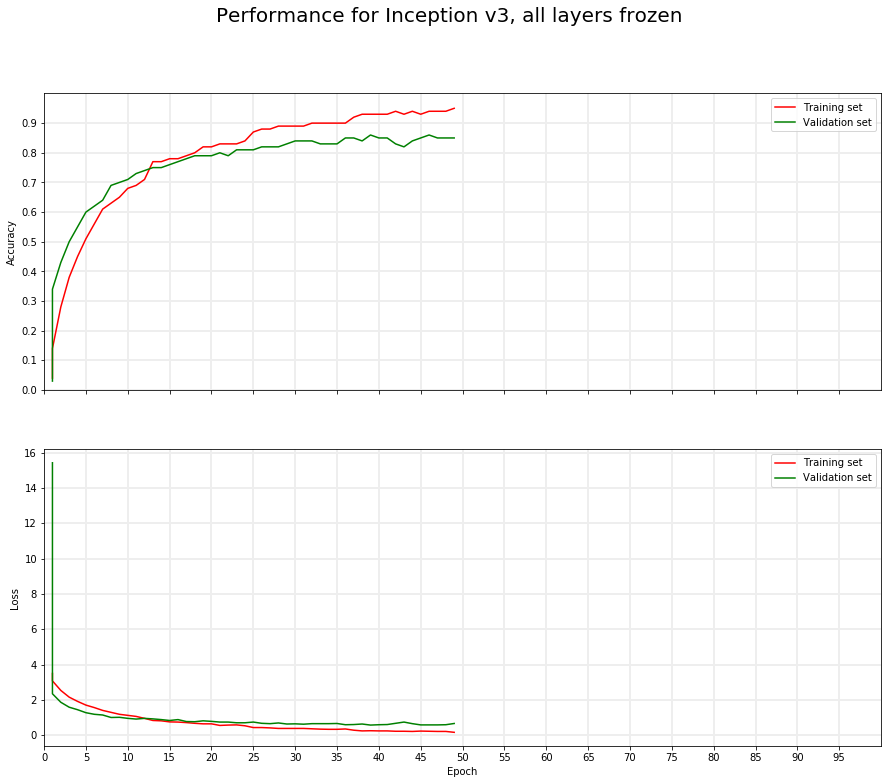

In [10]:
data = ModelPerformanceData.from_ls_output('model-03-inceptionv3-part-01-train-history.txt')
plot_model_perf(data, 'Performance for Inception v3, all layers frozen')

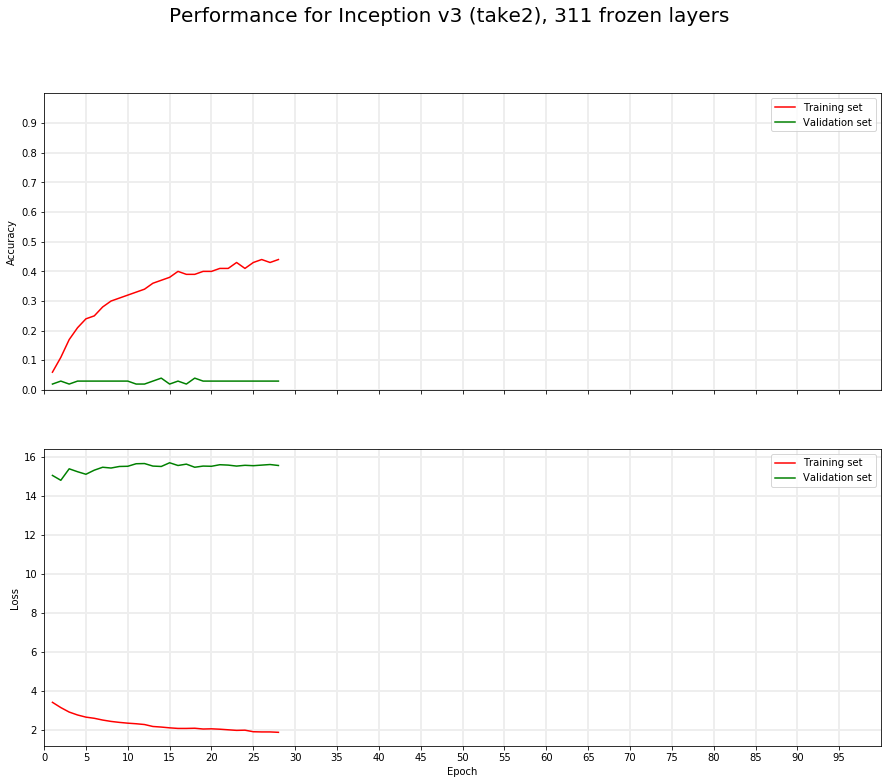

In [11]:
data = ModelPerformanceData.from_ls_output('model-07-inceptionv3-take-2-part-01-train-history.txt')
plot_model_perf(data, 'Performance for Inception v3 (take2), 311 frozen layers')

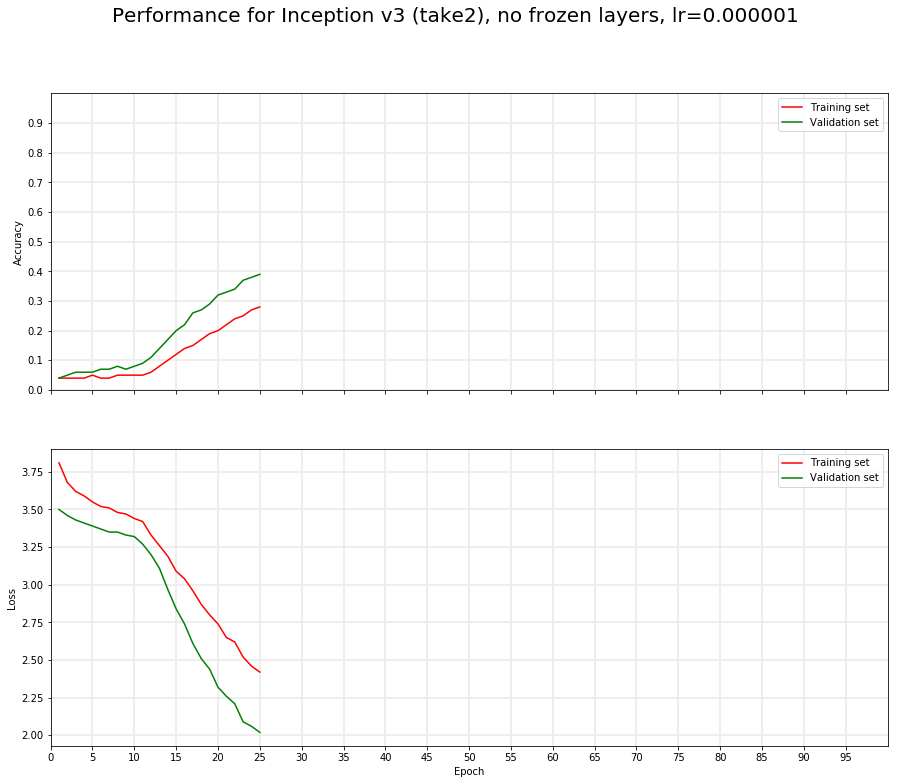

In [12]:
data = ModelPerformanceData.from_ls_output('model-07-inceptionv3-take-2-part-02-train-history.txt')
plot_model_perf(data, 'Performance for Inception v3 (take2), no frozen layers, lr=0.000001')